In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
import numpy as np
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin'



# Criando um DataFrame com os dados fictícios
data = {
    'idade': [25, 34, 45, 52, 23, 40, 37, 29, 50, 31],
    'sexo': ['F', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M'],
    'pressao_Sistolica': [120, 130, 140, 150, 110, 135, 145, 125, 160, 128],
    'colesterol': [200, 220, 240, 250, 180, 210, 230, 190, 260, 200],
    'fumante': ['Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Não'],
    'doenca': ['Não', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Não']
}

dados = pd.DataFrame(data)
dados


,idade,sexo,pressao_Sistolica,colesterol,fumante,doenca
0,25,F,120,200,Não,Não
1,34,M,130,220,Sim,Sim
2,45,M,140,240,Sim,Sim
3,52,F,150,250,Não,Sim
4,23,F,110,180,Não,Não
5,40,M,135,210,Sim,Sim
6,37,F,145,230,Sim,Sim
7,29,M,125,190,Não,Não
8,50,F,160,260,Sim,Sim
9,31,M,128,200,Não,Não


In [38]:
a_trocar = {
    'Não' : 0,
    'Sim' : 1     
}

s_trocar ={
    'M' : 0,
    'F' : 1
}

dados.doenca = dados.doenca.map(a_trocar)
dados.fumante = dados.fumante.map(a_trocar)
dados.sexo = dados.sexo.map(s_trocar)

x = dados[["idade", "sexo", "pressao_Sistolica", "colesterol", "fumante"]]
y = dados ["doenca"]

dados.head()

,idade,sexo,pressao_Sistolica,colesterol,fumante,doenca
0,25,1,120,200,0,0
1,34,0,130,220,1,1
2,45,0,140,240,1,1
3,52,1,150,250,0,1
4,23,1,110,180,0,0


In [39]:
dados.shape

(10, 6)

In [40]:
treino_x = x[:7]
treino_y = y[:7]
teste_x = x [7:]
teste_y = y[7:]

# print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

In [41]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previssoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previssoes) * 100

print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 33.33%


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5


treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state = SEED, test_size = 0.25,
                                                        stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previssoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previssoes) * 100

print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7 elementos e testaremos com 3 elementos
A acurácia foi 100.00%


<Axes: xlabel='idade', ylabel='colesterol'>

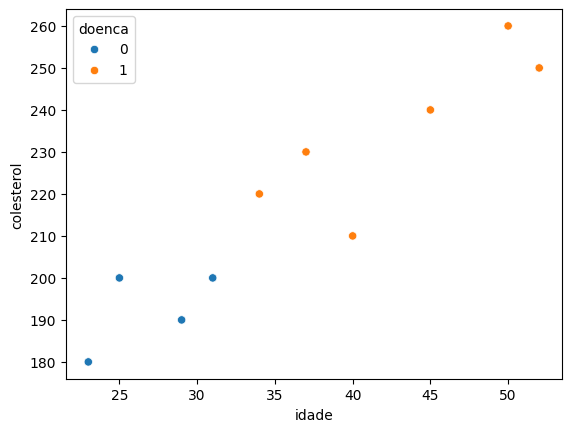

In [43]:
sns.scatterplot(x="idade", y="colesterol", hue="doenca", data=dados)

<Axes: xlabel='idade', ylabel='pressao_Sistolica'>

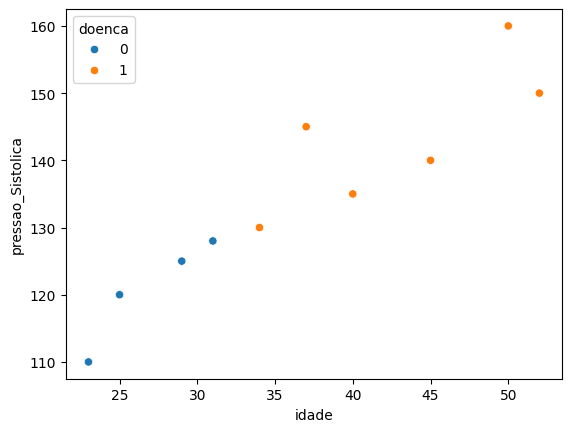

In [44]:
sns.scatterplot(x="idade", y="pressao_Sistolica", hue="doenca", data=dados)


In [45]:
dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100


# acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 33.33%


In [46]:
dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100

# acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy mostfrequent foi 66.67%


In [57]:
SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier()
modelo.fit(raw_treino_x, treino_y)
previssoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previssoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7 elementos e testaremos com 3 elementos
A acurácia foi 100.00%


In [58]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled=True, rounded=True,
                           feature_names= features,
                           class_names=["Não", "Sim"])

grafico = graphviz.Source(dot_data)

grafico.view()

'Source.gv.pdf'